(500, 784)
int64
3


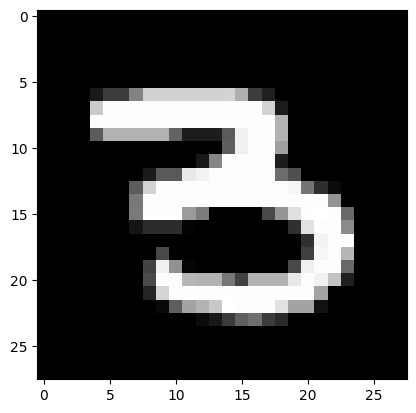

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from segmentacion.otsu import thresholding

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",500)

print(x.shape)
print(x.dtype)
digit = x[50]
label = y[50]
print(label)
digit_pixels = digit.reshape(28, 28)

digit_pixels = digit_pixels.astype(np.uint8)

plt.imshow(digit_pixels, cmap='gray')
plt.show()

In [2]:
moments = cv2.moments(digit_pixels)
hu_moments = cv2.HuMoments(moments)

for i in range(7):
    print(f"Hu Moment {i + 1}: {hu_moments[i][0]}")

Hu Moment 1: 0.0013091101126899956
Hu Moment 2: 2.7114890485462383e-07
Hu Moment 3: 5.438315845081096e-11
Hu Moment 4: 1.539741630168012e-11
Hu Moment 5: -6.88687961270797e-23
Hu Moment 6: -8.01440265048767e-15
Hu Moment 7: -4.402031209382854e-22


Hu Moment 1: 0.0013148044161204416
Hu Moment 2: 2.703257366653861e-07
Hu Moment 3: 5.3596737577002077e-11
Hu Moment 4: 1.5465475758096825e-11
Hu Moment 5: -6.11560109059106e-23
Hu Moment 6: -8.033725086786013e-15
Hu Moment 7: -4.410405827130097e-22


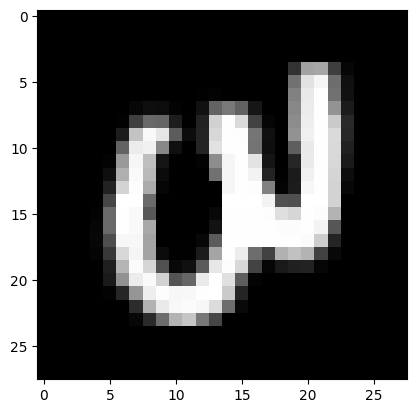

In [3]:
def rotar(imagen, angulo_rotacion):
    alto, ancho = imagen.shape[:2]
    centro = (ancho // 2, alto // 2)
    matriz_rotacion = cv2.getRotationMatrix2D(centro, angulo_rotacion, 1.0)
    imagen_rotada = cv2.warpAffine(imagen, matriz_rotacion, (ancho, alto))
    return imagen_rotada


angulo_rotacion = 268
img = rotar(digit_pixels, angulo_rotacion)

moments = cv2.moments(img)
hu_moments = cv2.HuMoments(moments)

for i in range(7):
    print(f"Hu Moment {i + 1}: {hu_moments[i][0]}")
    
plt.imshow(img, cmap='gray')

In [9]:
import imageio
import sys
import numpy as np

def find_eta(i_val, j_val, imgarr):
	lamda = ((i_val+j_val)/2) + 1
	mu = find_mu(i_val, j_val, imgarr)
	return mu/((m00)**lamda)

def find_mu(i_val, j_val, imgarr):
	cnt = 0
	for i in range(len(imgarr)):
		for j in range(len(imgarr[0])):
			cnt += ((i+1)-m10m00)**i_val * ((j+1)-m01m00)**j_val * imgarr[i,j]
	return cnt


im = img
if len(np.shape(im)) == 3:
	im = im[:,:,0]
im = im / 255
#im = im*255

m00 = np.sum(im)
m10m00 = 0
for i in range(len(im)):
	for j in range(len(im[0])):
		m10m00 += (j+1)*im[i,j]
m10m00 = m10m00/m00

m01m00 = 0
for i in range(len(im)):
	for j in range(len(im[0])):
		m01m00 += (i+1)*im[i,j]
m01m00 = m01m00/m00

eta0_2 = find_eta(0,2,im)
eta0_3 = find_eta(0,3,im)
eta1_1 = find_eta(1,1,im)
eta1_2 = find_eta(1,2,im)
eta2_0 = find_eta(2,0,im)
eta2_1 = find_eta(2,1,im)
eta3_0 = find_eta(3,0,im)

phi1 = eta2_0 + eta0_2
phi2 = ((eta2_0 - eta0_2)**2) + (4*(eta1_1**2))
phi3 = ((eta3_0 - (3*eta1_2))**2) + ((3*eta2_1 - eta0_3)**2)
phi4 = ((eta3_0 + eta1_2)**2) + ((eta2_1 + eta0_3)**2)
phi5 = (eta3_0 - (3*eta1_2)) * (eta3_0 + eta1_2) * ((eta3_0 + eta1_2)**2 - (3*(eta2_1 + eta0_3)**2)) + ((3*eta2_1) - eta0_3) * (eta2_1 + eta0_3) * ((3*(eta3_0 + eta1_2)**2) - ((eta2_1 + eta0_3)**2))
phi6 = (eta2_0 - eta0_2) * ((eta3_0 + eta1_2)**2 - (eta2_1 + eta0_3)**2) + (4*eta1_1) * (eta3_0 + eta1_2) * (eta2_1 + eta0_3)
phi7 = ((3*eta2_1) - eta0_3) * (eta3_0 + eta1_2) * ((eta3_0 + eta1_2)**2 - (3*(eta2_1 + eta0_3)**2)) - (eta3_0 - (3*eta1_2)) * (eta2_1 + eta0_3) * ((3*(eta3_0 + eta1_2)**2) - ((eta2_1 + eta0_3)**2))

print('phi1', phi1)
print('phi2', phi2)
print('phi3', phi3)
print('phi4', phi4)
print('phi5', phi5)
print('phi6', phi6)
print('phi7', phi7)

phi1 0.3356208262454593
phi2 0.01766643438219293
phi3 0.0013837968249865874
phi4 0.0005102551968704344
phi5 -3.273192931379795e-07
phi6 -1.2149882927842277e-05
phi7 -2.76947299144039e-07


In [57]:
import numpy as np

# Función para calcular momentos centrales
def central_moments(image, p, q):
    height, width = image.shape
    m00 = np.sum(image)
    m10 = np.sum(np.array([[x * image[y, x] for x in range(width)] for y in range(height)]))
    m01 = np.sum(np.array([[y * image[y, x] for x in range(width)] for y in range(height)]))
    x_bar = m10 / m00
    y_bar = m01 / m00
    central_moment = np.sum(np.array([[(x - x_bar) ** p * (y - y_bar) ** q * image[y, x] for x in range(width)] for y in range(height)]))
    return central_moment

# Función para calcular momentos de Hu
def calculate_hu_moments(image):

    # Calcular los momentos centrales
    m00 = central_moments(image, 0, 0)
    m20 = central_moments(image, 2, 0)
    m02 = central_moments(image, 0, 2)
    m11 = central_moments(image, 1, 1)
    m30 = central_moments(image, 3, 0)
    m03 = central_moments(image, 0, 3)
    m12 = central_moments(image, 1, 2)
    m21 = central_moments(image, 2, 1)

    phi1 = m20 + m02
    phi2 = (m20 - m02) ** 2 + 4 * m11 ** 2
    phi3 = (m30 - 3 * m12) ** 2 + (3 * m21 - m03) ** 2
    phi4 = (m30 + m12) ** 2 + (m21 + m03) ** 2
    phi5 = (m30 - 3 * m12) * (m30 + m12) * ((m30 + m12) ** 2 - 3 * (m21 + m03) ** 2) + (3 * m21 - m03) * (m21 + m03) * (3 * (m30 + m12) ** 2 - (m21 + m03) ** 2)
    phi6 = (m20 - m02) * ((m30 + m12) ** 2 - (m21 + m03) ** 2) + 4 * m11 * (m30 + m12) * (m21 + m03)
    phi7 = (3 * m21 - m03) * (m30 + m12) * ((m30 + m12) ** 2 - 3 * (m21 + m03) ** 2) - (m30 - 3 * m12) * (m21 + m03) * (3 * (m30 + m12) ** 2 - (m21 + m03) ** 2)

    return phi1, phi2, phi3, phi4, phi5, phi6, phi7

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 

x, y = loadDataset("Nmist/mnist_test.csv", 10000)

# Inicializa una lista para almacenar los datos
data = []

for i in range(len(x)):
    digit_pixels = x[i].reshape(28, 28)
    digit_pixels = digit_pixels.astype(np.uint8)
    phi1, phi2, phi3, phi4, phi5, phi6, phi7 = calculate_hu_moments(digit_pixels)
    label = y[i]

    # Agrega los valores a la lista
    data.append([phi1, phi2, phi3, phi4, phi5, phi6, phi7, label])

# Crea un DataFrame a partir de la lista
df = pd.DataFrame(data, columns=["phi1", "phi2", "phi3", "phi4", "phi5", "phi6", "phi7", "label"])
df.to_csv('HU.csv', index=False)

df



,phi1,phi2,phi3,phi4,phi5,phi6,phi7,label
0,1.814590e+06,7.392247e+11,7.077952e+13,5.635857e+12,-8.098003e+25,-4.819605e+18,7.818280e+25,2
1,3.448097e+05,1.131864e+11,9.918102e+10,8.910702e+10,8.376778e+21,2.992241e+16,-4.066368e+19,1
2,1.674055e+06,1.993283e+11,5.583293e+12,5.454077e+10,-1.383214e+22,-1.447226e+16,2.673047e+22,0
3,7.992906e+05,1.526937e+10,5.378999e+12,5.690699e+11,-9.955931e+23,6.055253e+16,-8.883689e+21,4
4,4.555980e+05,1.888267e+11,6.637783e+10,3.199112e+10,1.430639e+21,1.025649e+16,3.557121e+20,1
...,...,...,...,...,...,...,...,...
9994,2.083201e+06,6.886088e+11,1.823384e+13,1.726826e+12,-6.657738e+24,-5.433266e+17,7.040280e+24,2
9995,1.774075e+06,6.399588e+11,2.396363e+13,4.516336e+12,-4.173767e+25,-3.528432e+18,-2.157594e+25,3
9996,1.009460e+06,2.481777e+11,1.070125e+13,2.123755e+11,2.041230e+23,6.046177e+16,2.466565e+23,4
9997,1.085752e+06,3.755997e+11,1.768395e+13,4.049025e+12,2.696291e+25,9.763136e+17,-2.114001e+25,5


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.neighbors import KNeighborsClassifier
from segmentacion.otsu import thresholding

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x,y
 
x,y=loadDataset("Nmist/mnist_test.csv",500)

print(x.shape)
print(x.dtype)
digit = x[50]
label = y[50]

digit_pixels = digit.reshape(28, 28)

digit_pixels = digit_pixels.astype(np.uint8)

phi1, phi2, phi3, phi4, phi5, phi6, phi7 = calculate_hu_moments(digit_pixels)
print('phi1', phi1)
print('phi2', phi2)
print('phi3', phi3)
print('phi4', phi4)
print('phi5', phi5)
print('phi6', phi6)
print('phi7', phi7)

(500, 784)
int64
phi1 1886178.6325148847
phi2 562886898774.4496
phi3 4285298058708.714
phi4 1213289556295.2969
phi5 -4.27617732136536e+23
phi6 -9.099015570502998e+17
phi7 -2.7332938985563474e+24


In [59]:
def rotar(imagen, angulo_rotacion):
    alto, ancho = imagen.shape[:2]
    centro = (ancho // 2, alto // 2)
    matriz_rotacion = cv2.getRotationMatrix2D(centro, angulo_rotacion, 1.0)
    imagen_rotada = cv2.warpAffine(imagen, matriz_rotacion, (ancho, alto))
    return imagen_rotada
angulo_rotacion = 268
img = rotar(digit_pixels, angulo_rotacion)

phi1, phi2, phi3, phi4, phi5, phi6, phi7 = calculate_hu_moments(img)
print('phi1', phi1)
print('phi2', phi2)
print('phi3', phi3)
print('phi4', phi4)
print('phi5', phi5)
print('phi6', phi6)
print('phi7', phi7)

phi1 1895780.7038870747
phi2 562006429405.7004
phi3 4231123638129.67
phi4 1220901551348.9614
phi5 -3.811306464102966e+23
phi6 -9.144527526534614e+17
phi7 -2.7486109687760194e+24


phi1 30570824.881669335
phi2 147854163987634.38
phi3 4381221235597333.0
phi4 1214649352259757.2
phi5 -4.248602851734804e+29
phi6 -1.4765506167370332e+22
phi7 -2.7696406063911734e+30


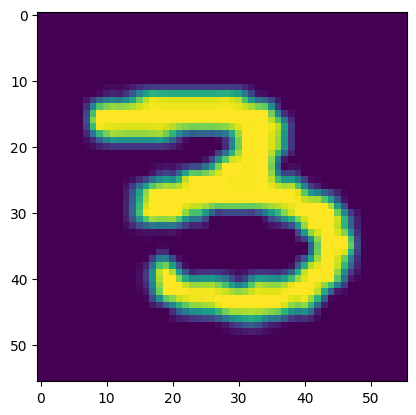

In [61]:
zoom_factor = 2  
height, width = digit_pixels.shape[:2]
# Define the new dimensions
new_height = int(height * zoom_factor)
new_width = int(width * zoom_factor)
# Use OpenCV resize function for zooming
zoomed_image = cv2.resize(digit_pixels, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
plt.imshow( zoomed_image)
phi1, phi2, phi3, phi4, phi5, phi6, phi7 = calculate_hu_moments(zoomed_image)
print('phi1', phi1)
print('phi2', phi2)
print('phi3', phi3)
print('phi4', phi4)
print('phi5', phi5)
print('phi6', phi6)
print('phi7', phi7)

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Carga los datos (final_df) que contienen los momentos de Hu y las etiquetas
data = df.drop('label', axis=1)  # Elimina la columna "Label" para las características
labels = df['label']  # Las etiquetas

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=4)
print(X_train.shape)
X_train

# Entrena un clasificador k-NN
k = 6# Número de vecinos cercanos
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Evalúa el rendimiento del modelo
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print(report)


(800, 7)
Precisión del modelo: 0.295
              precision    recall  f1-score   support

           0       0.26      0.26      0.26        19
           1       0.70      0.83      0.76        23
           2       0.34      0.46      0.39        26
           3       0.10      0.13      0.12        23
           4       0.14      0.13      0.14        23
           5       0.16      0.20      0.18        15
           6       0.16      0.23      0.19        13
           7       0.45      0.26      0.33        19
           8       0.38      0.20      0.26        15
           9       0.25      0.12      0.17        24

    accuracy                           0.29       200
   macro avg       0.30      0.28      0.28       200
weighted avg       0.30      0.29      0.29       200



In [208]:
import pandas as pd
import numpy as np
import cv2

def loadDataset(fileName, samples):
    x = []
    y = []
    train_data = pd.read_csv(fileName)
    y = np.array(train_data.iloc[0:samples, 0])
    x = np.array(train_data.iloc[0:samples, 1:])
    return x, y

def calculate_hu_moments(image):
    moments = cv2.moments(image)
    hu_moments = cv2.HuMoments(moments)
    
    for i in range(0, 7):
        hu_moments[i] = -1 * np.sign(hu_moments[i]) * np.log10(np.abs(hu_moments[i]))
    
    return hu_moments.flatten()


columns = ['Hu Moment 1', 'Hu Moment 2', 'Hu Moment 3', 'Hu Moment 4', 'Hu Moment 5', 'Hu Moment 6', 'Hu Moment 7', 'Label']
final_df = pd.DataFrame(columns=columns)

x, y = loadDataset("Nmist/mnist_test.csv", 10000)

for i in range(len(x)):
    digit_pixels = x[i].reshape(28, 28)
    digit_pixels = digit_pixels.astype(np.uint8)

    hu_moments = calculate_hu_moments(digit_pixels)
    label = y[i]
    row_data = np.append(hu_moments, label)
    final_df.loc[i] = row_data
    final_df['Label'] = final_df['Label'].astype(int)

final_df = final_df.dropna()
final_df





,Hu Moment 1,Hu Moment 2,Hu Moment 3,Hu Moment 4,Hu Moment 5,Hu Moment 6,Hu Moment 7,Label
0,2.661513,5.971807,8.450821,9.549769,-18.693080,-12.538009,18.708347,2
1,2.451143,4.923650,8.975377,9.021894,18.020534,11.484531,-20.334405,1
2,2.912962,6.973895,10.094940,12.105109,-23.542771,-15.818026,23.256654,0
3,2.665570,6.952728,8.689985,9.665521,-18.843292,13.206829,-20.892780,4
4,2.624631,5.290363,9.886010,10.203003,20.260535,12.980247,20.864967,1
...,...,...,...,...,...,...,...,...
9994,2.858328,6.516145,9.681769,10.705398,-21.061967,-14.384645,21.037704,2
9995,2.824549,6.340890,9.304249,10.029016,-19.747076,-13.209741,-20.033634,3
9996,2.927598,6.468612,9.299784,11.002114,21.348545,14.479425,21.266344,4
9997,2.812693,6.122122,8.873479,9.513708,18.811350,12.979893,-18.917012,5


In [243]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.svm import SVC as SVM
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestCentroid as NC
from sklearn.model_selection import train_test_split as data_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

classifiers = {
	"NC"         : NC(),
	"LDA"        : LDA(),
	"QDA"        : QDA(),
	#"SVM_linear" : SVM(kernel="linear"),
	#"SVM_radial" : SVM(kernel="rbf")
}

def classification(data_file, rounds=100, remove_disperse=[]):
	df_copy = data_file.copy() 
	
	if remove_disperse:
		df_copy = df_copy.drop(remove_disperse, axis=1)
	
	X = df_copy.drop('Label', axis=1)
	y = df_copy['Label']
	
	ans = {key: {"score" : []} for key, value in classifiers.items()}
	
	print("Classifying...")
	
	for i in range(rounds):
		X_train, X_test, y_train, y_test = data_split(X, y, test_size=0.2)
		
		for name, classifier in classifiers.items():
			scaler = StandardScaler()
			scaler.fit(X_train)
			X_train = scaler.transform(X_train)
			X_test = scaler.transform(X_test)
			
			classifier.fit(X_train, y_train)
			score = classifier.score(X_test, y_test)
			
			ans[name]["score"].append(score)
		
	print("Classification done!")
	
	return ans

ans = classification(final_df)

def sumary(ans, title="Summary"):
	size = 70
	separator = "-"
	
	print(separator*size)
	print("SUMARY: {}".format(title))
	print(separator*size)
	print("CLASSIF\t\tMEAN\tMEDIAN\tMINV\tMAXV\tSTD")
	print(separator*size)
	
	for n in ans:
		m = round(np.mean(ans[n]["score"])*100, 2)
		med = round(np.median(ans[n]["score"])*100, 2)
		minv = round(np.min(ans[n]["score"])*100, 2)
		maxv = round(np.max(ans[n]["score"])*100, 2)
		std = round(np.std(ans[n]["score"])*100, 2)
		
		print("{:<16}{}\t{}\t{}\t{}\t{}".format(n, m, med, minv, maxv, std))
	
	print(separator*size)
	print()

sumary(ans)

Classifying...
Classification done!
----------------------------------------------------------------------
SUMARY: Summary
----------------------------------------------------------------------
CLASSIF		MEAN	MEDIAN	MINV	MAXV	STD
----------------------------------------------------------------------
NC              41.65	41.75	38.65	43.8	0.97
LDA             50.64	50.7	47.3	52.75	1.04
QDA             52.83	52.75	50.55	55.1	1.06
----------------------------------------------------------------------



In [175]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Carga los datos (final_df) que contienen los momentos de Hu y las etiquetas
data = final_df.drop('Label', axis=1)  # Elimina la columna "Label" para las características
labels = final_df['Label']  # Las etiquetas

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=4)
print(X_train.shape)
X_train

# Entrena un clasificador k-NN
k = 6# Número de vecinos cercanos
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Evalúa el rendimiento del modelo
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy}')
print(report)


(7999, 7)
Precisión del modelo: 0.4985
              precision    recall  f1-score   support

           0       0.49      0.64      0.55       202
           1       0.82      0.89      0.85       236
           2       0.30      0.38      0.34       208
           3       0.45      0.52      0.48       182
           4       0.41      0.37      0.39       195
           5       0.23      0.12      0.15       172
           6       0.58      0.68      0.62       196
           7       0.67      0.67      0.67       207
           8       0.24      0.21      0.22       179
           9       0.55      0.38      0.45       223

    accuracy                           0.50      2000
   macro avg       0.47      0.48      0.47      2000
weighted avg       0.49      0.50      0.49      2000

